# Table of Contents:
- Introduction
- problem Statement
- Objectives
- Code:
    - Installing & Importing Packages
    - Downloading & Reading Data
    - Exploratory Data Analysis
    - Data Preprocessing
    - Feature Extraction
    - Feature Importance
    - Feature Selection
    - Modeling
    - Evaluation
    - Conclustion

## Introduction 

## Problem Statement

## Objectives

## Code:
### 1) Installing Needed Packages

You might need to restart the kernel after installing them

In [110]:
# ! pip install ipywidgets
# ! pip install pandas-profiling
# ! pip install yfinance
# !pip install skforecast

### 2) Importing Needed libraries

In [146]:
import pandas as pd
import yfinance as yf
import numpy as np
from pandas_profiling import ProfileReport
from ipywidgets import widgets
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 3) Downloading & Reading Datasets
- Downloading datasets from yahoo finance and reading the rest
- Adjusting the needed columns types from the datasets and choosing the final columns to be used
- Defining the set of rows that we will include in our analysis (Dates from 2/1/1990 till 2/11/2022) 
- Merging all datasets to form the final **df** which will be the dataset of our problem


#### TO DO: Make a function to read data and output the merged dataset instead of repeating the steps for all features

In [112]:
TNX = pd.read_csv('TNX.csv')
TNX['Date'] = pd.to_datetime(TNX['Date'])
TNX = TNX[['Date', 'Adj Close']]
TNX.columns = ['Date', 'TNX_Close']
TNX = TNX[(TNX['Date']>='1990-01-02') &(TNX['Date']<='2022-11-02')]

In [113]:
HSI = pd.read_csv('HSI.csv')
HSI['Date'] = pd.to_datetime(HSI['Date'])
HSI = HSI[['Date', 'Adj Close']]
HSI.columns = ['Date', 'HSI_Close']
HSI = HSI[(HSI['Date']>='1990-01-02') &(HSI['Date']<='2022-11-02')]

In [114]:
VKOSPI = pd.read_csv('VKOSPI.csv')
VKOSPI['Date'] = pd.to_datetime(VKOSPI['Date'])
VKOSPI = VKOSPI[['Date', 'Adj Close']]
VKOSPI.columns = ['Date', 'VKOSPI_Close']
VKOSPI = VKOSPI[(VKOSPI['Date']>='1990-01-02') &(VKOSPI['Date']<='2022-11-02')]

In [115]:
GSPC = pd.read_csv('GSPC.csv')
GSPC['Date'] = pd.to_datetime(GSPC['Date'])
GSPC = GSPC[['Date', 'Adj Close']]
GSPC.columns = ['Date', 'GSPC_Close']
GSPC = GSPC[(GSPC['Date']>='1990-01-02') &(GSPC['Date']<='2022-11-02')]

In [116]:
GSCI = pd.read_csv('GSCI.csv')
GSCI['Date'] = pd.to_datetime(GSCI['Date'])
GSCI = GSCI[['Date', 'Adj Close']]
GSCI.columns = ['Date', 'GSCI_Close']
GSCI = GSCI[(GSCI['Date']>='1990-01-02') &(GSCI['Date']<='2022-11-02')]

In [117]:
VIX = pd.read_csv('VIX.csv')
VIX['Date'] = pd.to_datetime(VIX['Date'])
VIX = VIX[['Date', 'Adj Close']]
VIX.columns = ['Date', 'VIX_Close']
VIX = VIX[(VIX['Date']>='1990-01-02') &(VIX['Date']<='2022-11-02')]

In [118]:
CPI = pd.read_csv('CPI Data.csv')
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI.columns = ['Date', 'CPI_Close']
CPI = CPI[(CPI['Date']>='1990-01-02') &(CPI['Date']<='2022-11-02')]

In [119]:
doll_ind = pd.read_csv('Dollar Index.csv')
doll_ind['Date'] = pd.to_datetime(doll_ind['Date'])
doll_ind = doll_ind[['Date', 'Adj Close']]
doll_ind.columns = ['Date', 'Dollar_Close']
doll_ind = doll_ind[(doll_ind['Date']>='1990-01-02') &(doll_ind['Date']<='2022-11-02')]

In [120]:
GDP = pd.read_csv('GDP.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP.columns = ['Date', 'GDP_Close']
GDP = GDP[(GDP['Date']>='1990-01-02') &(GDP['Date']<='2022-11-02')]

In [121]:
EPU = pd.read_csv('EPU.csv')
EPU['DATE'] = pd.to_datetime(EPU['DATE'])
EPU.columns = ['Date', 'EPU_Close']
EPU = EPU[(EPU['Date']>='1990-01-02') &(EPU['Date']<='2022-11-02')]

#### Merging all data into the final dataset

In [122]:
df = pd.merge(VIX, TNX,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, doll_ind,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, CPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GDP,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSCI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, EPU,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSPC,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, VKOSPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, HSI,  how='left', left_on=['Date'], right_on = ['Date'])
df['Date'] = pd.to_datetime(df['Date'])

In [123]:
df

Date  VIX_Close  TNX_Close  Dollar_Close  CPI_Close  GDP_Close  \
0    1990-01-02  17.240000      7.940     94.290001        NaN        NaN   
1    1990-01-03  18.190001      7.990     94.419998        NaN        NaN   
2    1990-01-04  19.219999      7.980     92.519997        NaN        NaN   
3    1990-01-05  20.110001      7.990     92.849998        NaN        NaN   
4    1990-01-08  20.260000      8.020     92.050003        NaN        NaN   
...         ...        ...        ...           ...        ...        ...   
8270 2022-10-27  27.389999      3.937    110.589996        NaN        NaN   
8271 2022-10-28  25.750000      4.010    110.669998        NaN        NaN   
8272 2022-10-31  25.879999      4.077    111.529999        NaN        NaN   
8273 2022-11-01  25.809999      4.052    111.480003        NaN        NaN   
8274 2022-11-02  25.860001      4.059    111.349998        NaN        NaN   

      GSCI_Close  EPU_Close   GSPC_Close  VKOSPI_Close     HSI_Close  
0     212.089996     169.23   359.690002           NaN   2838.100098  
1     215.639999      59.10   358.760010           NaN   2858.699951  
2     212.139999      76.38   355.670013           NaN   2868.000000  
3     206.919998      57.82   352.200012           NaN   2839.899902  
4     199.750000     126.54   353.790009           NaN   2816.000000  
...          ...        ...          ...           ...           ...  
8270  643.830017     154.05  3807.300049   2288.780029  15427.940430  
8271  636.530029     200.40  3901.060059   2268.399902  14863.059570  
8272  636.840027     163.03  3871.979980   2293.610107  14687.019531  
8273  641.530029     130.32  3856.100098   2335.219971  15455.269531  
8274  649.270020      99.69  3759.689941   2336.870117  15827.169922  

[8275 rows x 11 columns]

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8275 entries, 0 to 8274
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8275 non-null   datetime64[ns]
 1   VIX_Close     8275 non-null   float64       
 2   TNX_Close     8243 non-null   float64       
 3   Dollar_Close  8273 non-null   float64       
 4   CPI_Close     253 non-null    float64       
 5   GDP_Close     71 non-null     float64       
 6   GSCI_Close    8274 non-null   float64       
 7   EPU_Close     8275 non-null   float64       
 8   GSPC_Close    8275 non-null   float64       
 9   VKOSPI_Close  6186 non-null   float64       
 10  HSI_Close     7912 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 775.8 KB


### 4) Exploratory Data Analysis
- Profile Reporting: Containing information about features: statistics and # number of missing values, etc.. and plots about distributions, interaction and correlation between features
- Time Series Plots for each feature
- Plots for target feature **VIX**; autocorrelation, seasonal decomposition, etc..
- Analysis of the major historical incidents 
- Observations and steps to do in preprocessing phase

In [125]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [126]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Observations:
- CPI & GDP have around 90% missing values - should be analyzed
- CPI & GDP are highly positively correlated - might need to drop one of them
- TNX is highly negatively correlated with CPI & GDP - might need to drop one or two of them

#### Correlation of all features with VIX 

In [127]:
df.corrwith(df["VIX_Close"]).sort_values(ascending=False)

VIX_Close       1.000000
EPU_Close       0.401285
Dollar_Close    0.162437
CPI_Close       0.082701
GDP_Close       0.047083
GSPC_Close     -0.001798
GSCI_Close     -0.031642
TNX_Close      -0.087714
HSI_Close      -0.091124
VKOSPI_Close   -0.261978
dtype: float64

#### Time Series Plots for all features

In [128]:
# defining function for plotting
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    sns.lineplot(data=df,x=x, y=y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


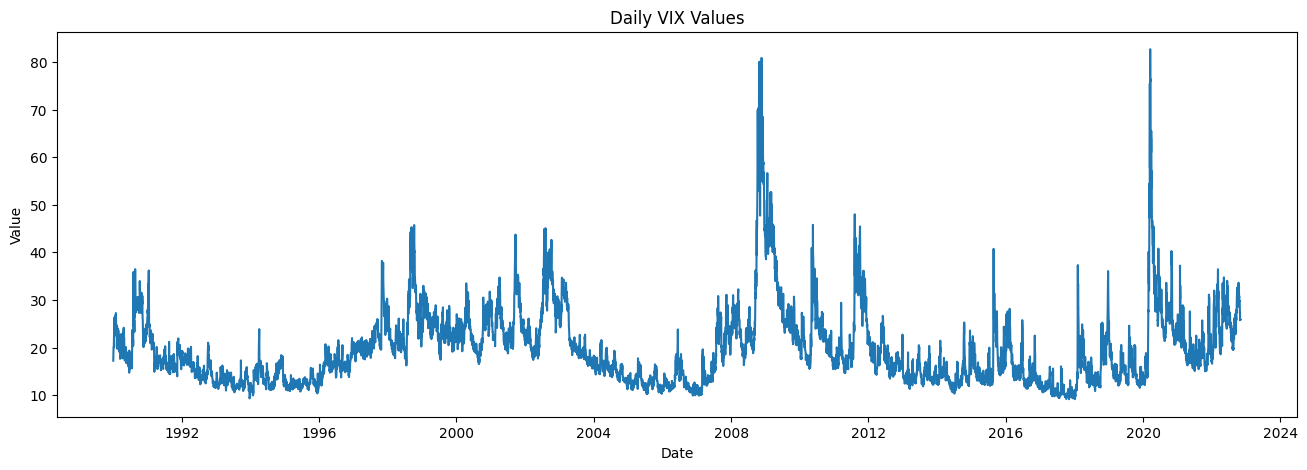

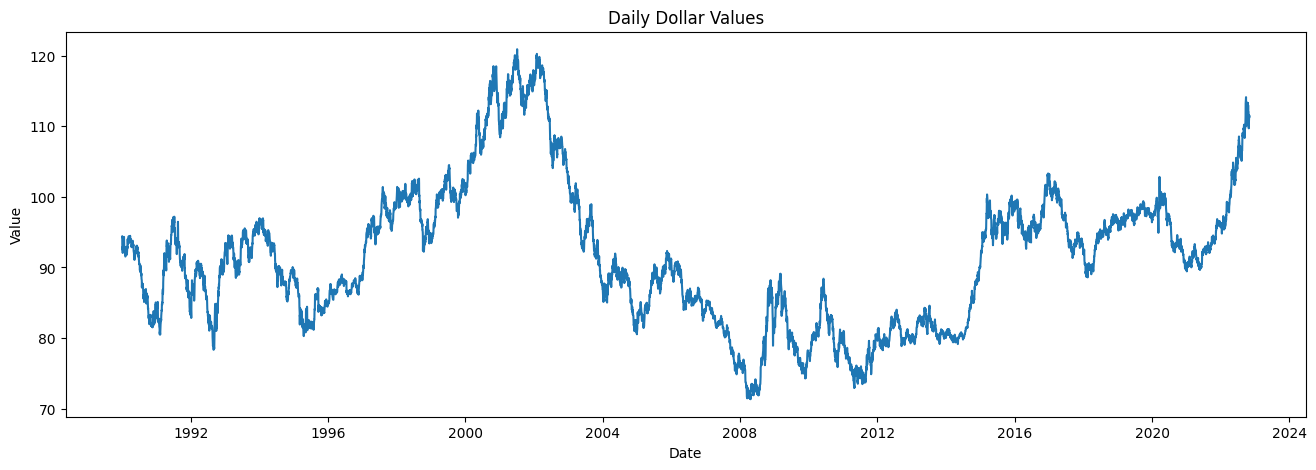

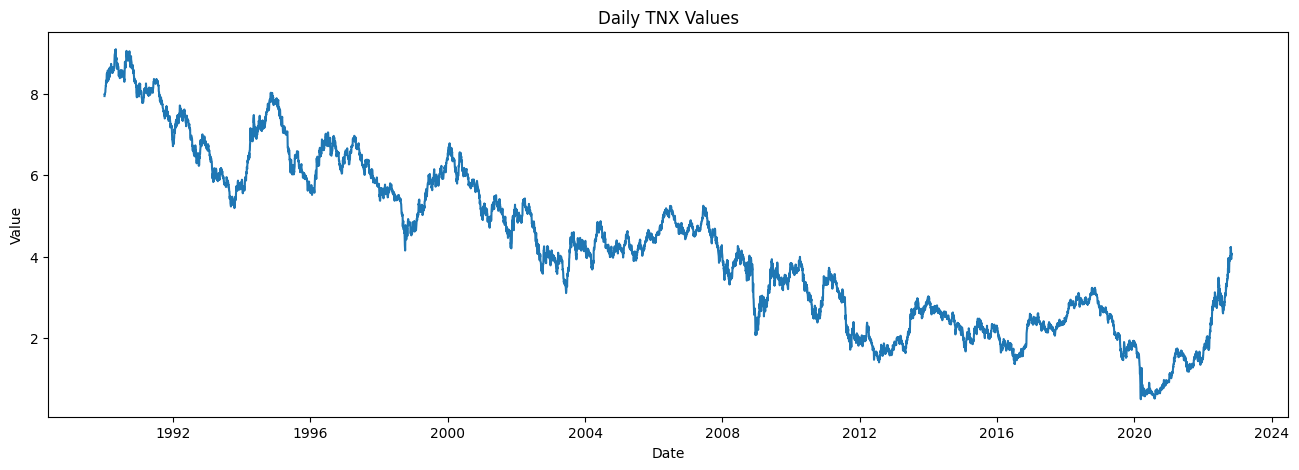

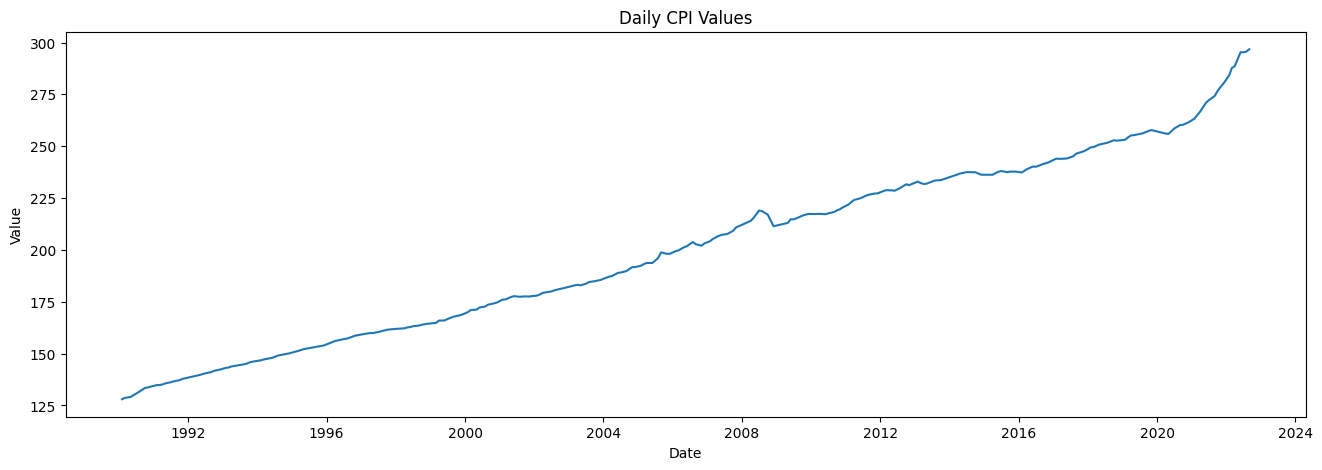

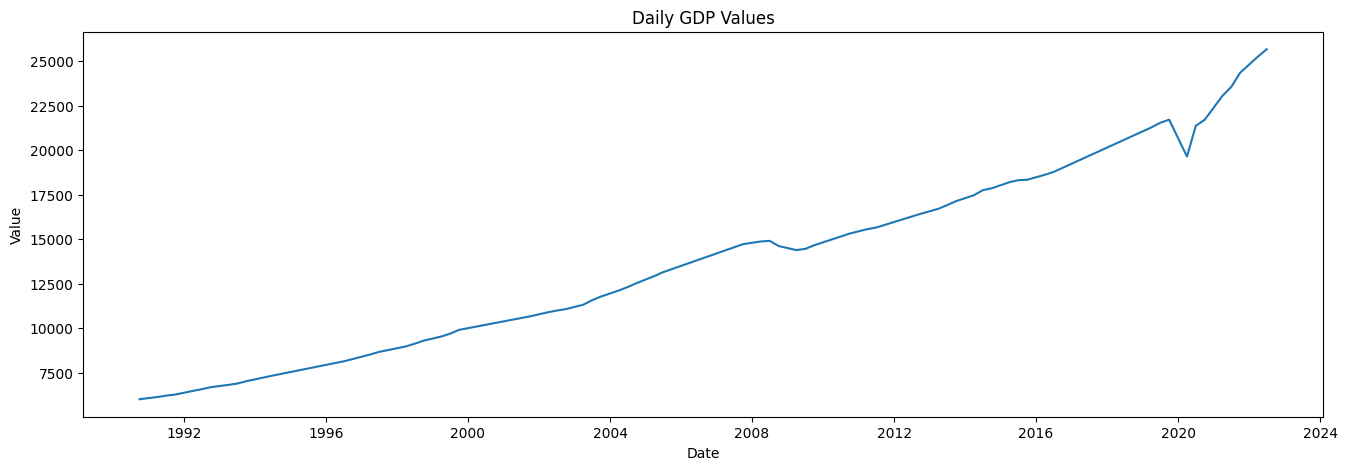

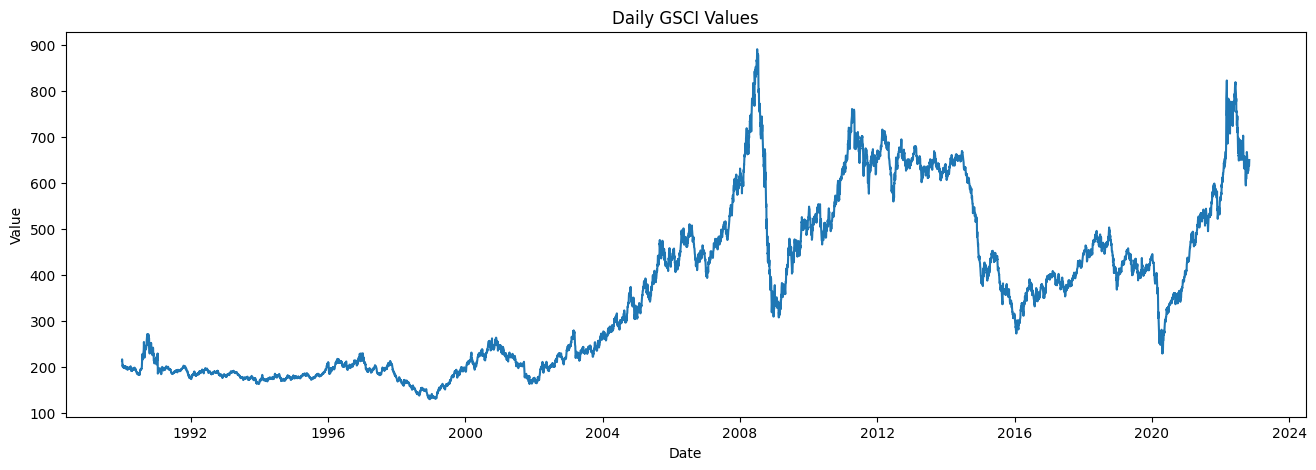

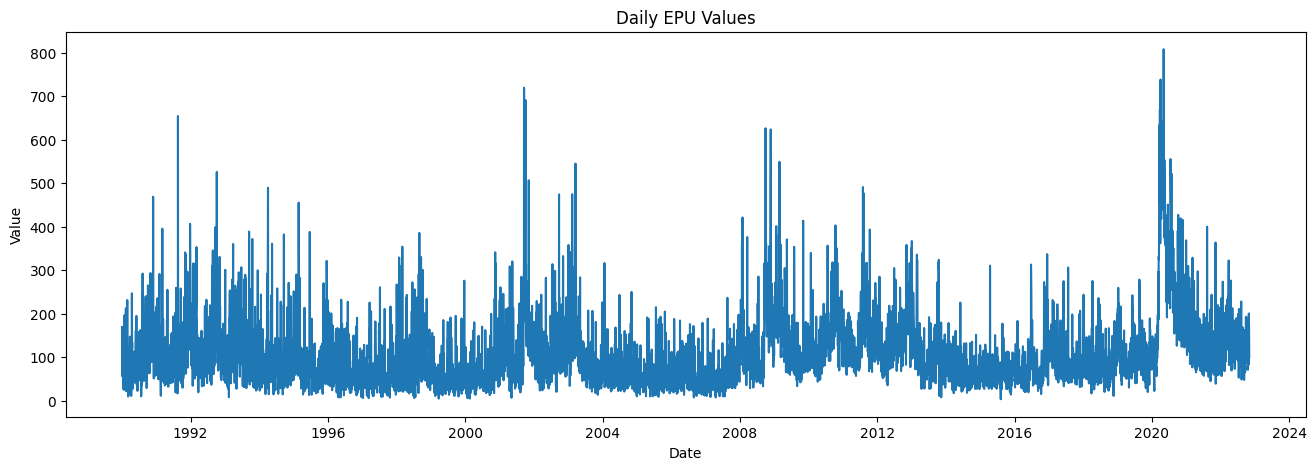

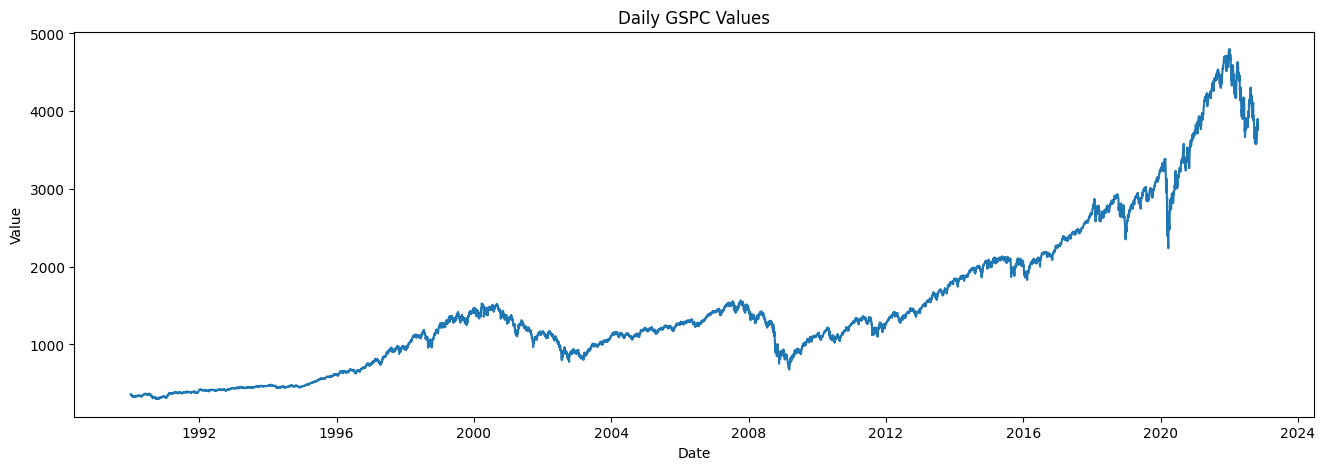

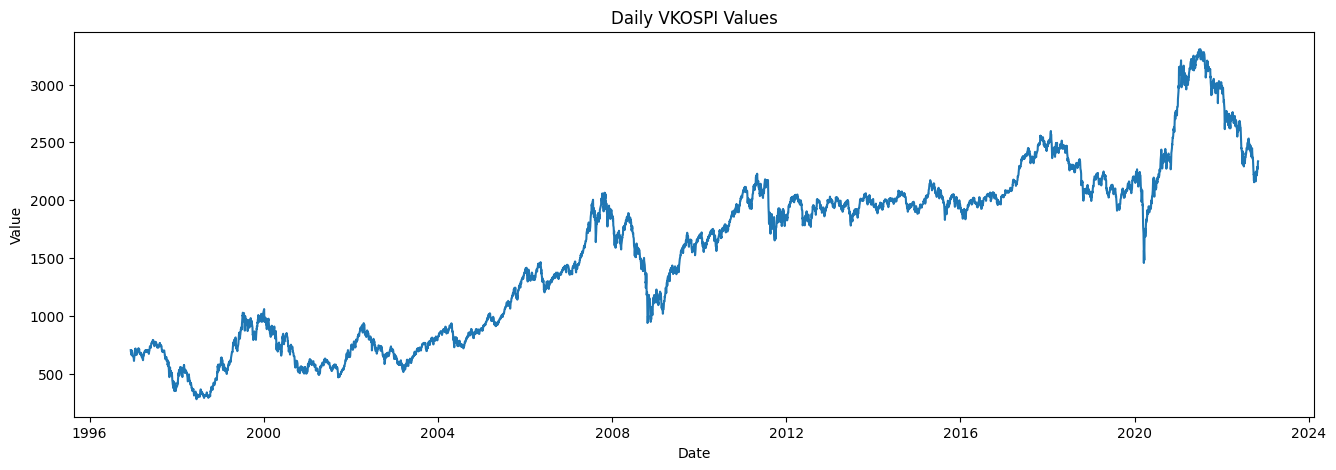

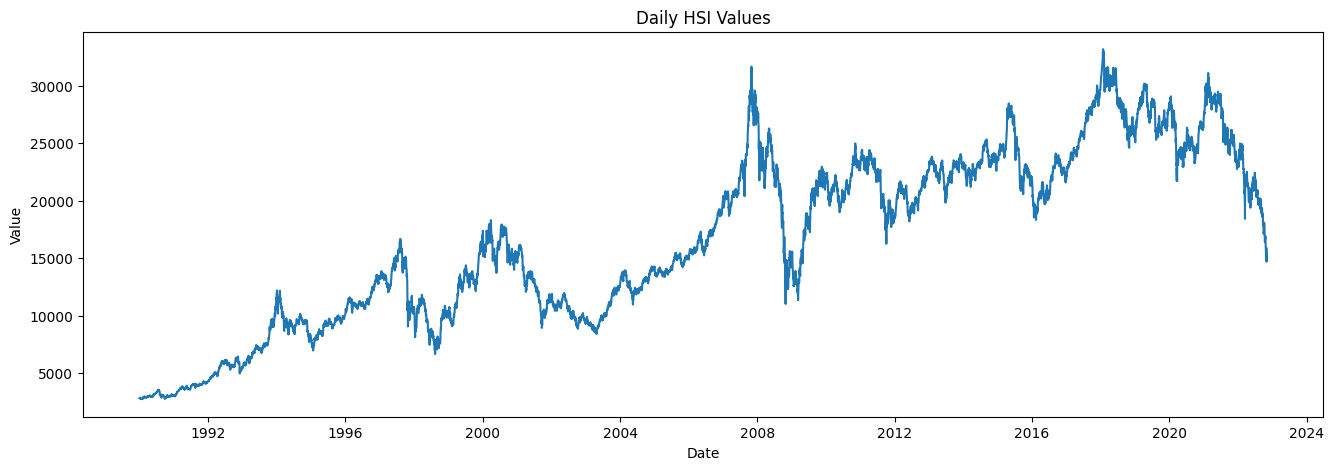

In [129]:
plot_df(df, 'Date', 'VIX_Close', title="Daily VIX Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'Dollar_Close', title="Daily Dollar Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'TNX_Close', title="Daily TNX Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'CPI_Close', title="Daily CPI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GDP_Close', title="Daily GDP Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GSCI_Close', title="Daily GSCI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'EPU_Close', title="Daily EPU Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GSPC_Close', title="Daily GSPC Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'VKOSPI_Close', title="Daily VKOSPI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'HSI_Close', title="Daily HSI Values", xlabel='Date', ylabel='Value', dpi=100)

#### Plotting ACF and PACF for VIX

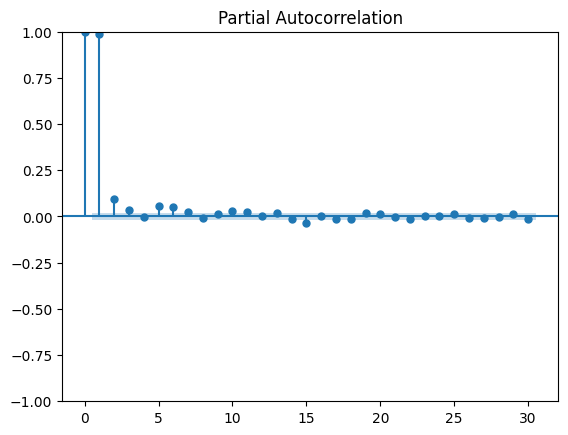

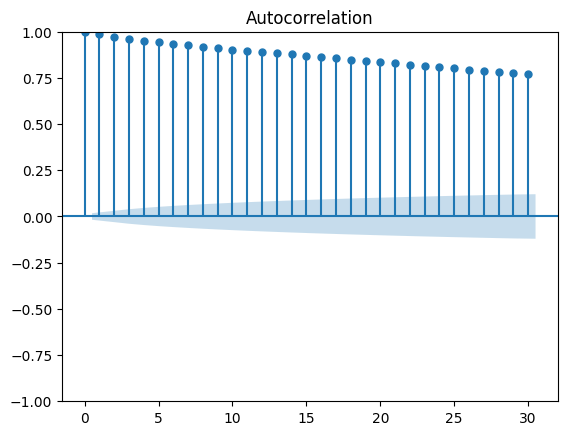

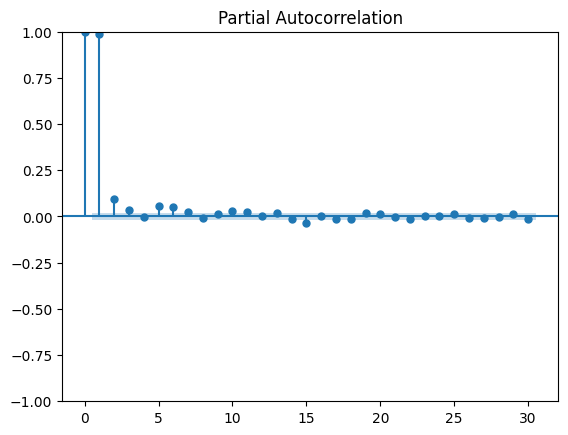

In [138]:
plot_acf(new_df.VIX_Close.tolist(), lags=30)
plot_pacf(new_df.VIX_Close.tolist(), lags=30)

##### Observations:
Based on ACF and PACF plots, we can see that the first lag has a very high correlation to the current VIX values. Lag 2 has also correlation, however not a large one like the first lag. After that, we can see a decreasing correlation to further lags.

### 5) Data Preprocessing
- Dealing with missing data
- Dealing with missing timestamps

#### Dealing with missing data

In [131]:
## 1st phase of filling missing values using forward fill
new_df = df
new_df.index = new_df['Date']
new_df.ffill(inplace=True)

In [132]:
## Adjusting the frequency to be daily because some days are missing 
new_df = new_df.asfreq("D")
new_df.drop(columns='Date', inplace=True)

In [133]:
## After adjusting the frequency extra rows were created with the missing dates with missing values 
## Filling the generated missing values using the forward fill then the remaining missing values to be filled with zeros
new_df.ffill(inplace=True)
new_df.fillna(0, inplace=True)

In [134]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VIX_Close     11993 non-null  float64
 1   TNX_Close     11993 non-null  float64
 2   Dollar_Close  11993 non-null  float64
 3   CPI_Close     11993 non-null  float64
 4   GDP_Close     11993 non-null  float64
 5   GSCI_Close    11993 non-null  float64
 6   EPU_Close     11993 non-null  float64
 7   GSPC_Close    11993 non-null  float64
 8   VKOSPI_Close  11993 non-null  float64
 9   HSI_Close     11993 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


##### Extracting Final data file to csv

In [135]:
# new_df.to_csv("Final Data.csv")

##### Reading Final Data instead of running the previous steps again

In [26]:
new_df = pd.read_csv("Final Data.csv")
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.index = new_df['Date']
new_df = new_df.asfreq("D")
# new_df.set_index(new_df['Date'],drop=True,inplace=True)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          11993 non-null  datetime64[ns]
 1   VIX_Close     11993 non-null  float64       
 2   TNX_Close     11993 non-null  float64       
 3   Dollar_Close  11993 non-null  float64       
 4   CPI_Close     11993 non-null  float64       
 5   GDP_Close     11993 non-null  float64       
 6   GSCI_Close    11993 non-null  float64       
 7   EPU_Close     11993 non-null  float64       
 8   GSPC_Close    11993 non-null  float64       
 9   VKOSPI_Close  11993 non-null  float64       
 10  HSI_Close     11993 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.1 MB


#### Seasonal Decomposition

In [93]:
# # Need to fill missing values first

# from statsmodels.tsa.seasonal import seasonal_decompose
# from matplotlib import pyplot
# # df.index = df['Date']
# result = seasonal_decompose(new_df['VIX_Close'], model='multiplicative')
# result.plot()
# pyplot.show()

### 6) Feature Extraction


In [29]:
## Date-related Features

new_df['year']=new_df.index.year 
new_df['month']=new_df.index.month 
new_df['day']=new_df.index.day
new_df['dayofweek']=new_df.index.weekday
new_df['weekofyear']=new_df.index.weekofyear
new_df['quarter']=new_df.index.quarter
new_df['month_start']=new_df.index.is_month_start
new_df['month_end']=new_df.index.is_month_end
new_df['quarter_start']=new_df.index.is_quarter_start
new_df['quarter_end']=new_df.index.is_quarter_end
new_df['year_start']=new_df.index.is_year_start
new_df['year_end']=new_df.index.is_year_end
new_df['leap_year']=new_df.index.is_leap_year

In [30]:
new_df.shape

(11993, 24)

In [31]:
## Lag-related Features (Target Dependent Features)
new_df['lag_1'] = new_df['VIX_Close'].shift(1)
new_df['lag_2'] = new_df['VIX_Close'].shift(2)

In [32]:
new_df.shape

(11993, 26)

In [33]:
## Rolling Features 

def one_week_rolling_feature_extratror(data, col):
    ''' Returns dataframe appended with additional features: last week average, maximum, minimum & std'''
    data[col+'_prev_week_mean'] = data[col].rolling(window=7).mean()
    data[col+'_prev_week_max'] = data[col].rolling(window=7).max()
    data[col+'_prev_week_min'] = data[col].rolling(window=7).min()
    data[col+'_prev_week_std'] = data[col].rolling(window=7).std()
    return data

In [34]:
columns = ['TNX_Close','Dollar_Close','CPI_Close','GDP_Close','GSCI_Close','EPU_Close','GSPC_Close','VKOSPI_Close','HSI_Close']
for col in columns:
    new_df = one_week_rolling_feature_extratror(new_df, col)

In [35]:
new_df.shape

(11993, 62)

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         11993 non-null  datetime64[ns]
 1   VIX_Close                    11993 non-null  float64       
 2   TNX_Close                    11993 non-null  float64       
 3   Dollar_Close                 11993 non-null  float64       
 4   CPI_Close                    11993 non-null  float64       
 5   GDP_Close                    11993 non-null  float64       
 6   GSCI_Close                   11993 non-null  float64       
 7   EPU_Close                    11993 non-null  float64       
 8   GSPC_Close                   11993 non-null  float64       
 9   VKOSPI_Close                 11993 non-null  float64       
 10  HSI_Close                    11993 non-null  float64       
 11  year            

In [66]:
## Filling missing values
new_df = new_df.bfill()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         11993 non-null  datetime64[ns]
 1   VIX_Close                    11993 non-null  float64       
 2   TNX_Close                    11993 non-null  float64       
 3   Dollar_Close                 11993 non-null  float64       
 4   CPI_Close                    11993 non-null  float64       
 5   GDP_Close                    11993 non-null  float64       
 6   GSCI_Close                   11993 non-null  float64       
 7   EPU_Close                    11993 non-null  float64       
 8   GSPC_Close                   11993 non-null  float64       
 9   VKOSPI_Close                 11993 non-null  float64       
 10  HSI_Close                    11993 non-null  float64       
 11  year            

In [86]:
# new_df.to_csv('Final Data with Features.csv')

### 7) Modeling:

- Split data to train and test
- Apply models



In [44]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [189]:
## Split data into train-test
## Testing only on last 7 days in datases

train=new_df.loc['1990-01-02':'2021-12-31'] 
test=new_df.loc['2022-01-01':'2022-11-02'] 
# valid=new_df.loc['2020-01-01':'2022-11-02']

print("Training data shape =", train.shape, "\nTesting data shape =", test.shape)

Training data shape = (11687, 62) 
Testing data shape = (306, 62)


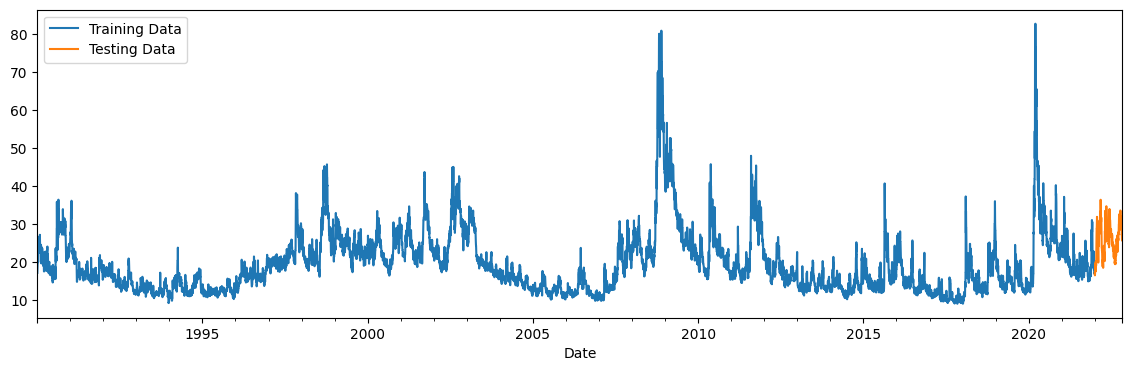

In [190]:
fig, ax=plt.subplots(figsize=(14, 4))
train['VIX_Close'].plot(ax=ax, label='Training Data')
test['VIX_Close'].plot(ax=ax, label='Testing Data')
# valid['VIX_Close'].plot(ax=ax, label='Validation Data')
ax.legend();

### Univariate Time Series Using Random Forest

In [191]:
# Create and train forecaster for univariate time series using Random Forest Regressor

forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 1
             )

forecaster.fit(y=train['VIX_Close'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1990-01-02 00:00:00'), Timestamp('2021-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-11-29 10:30:35 
Last fit date: 2022-11-29 10:30:37 
Skforecast version: 0.5.1 
Python version: 3.8.10 

In [192]:
## Calculating Predictions
predictions = forecaster.predict(steps=len(test))
predictions.head()

2022-01-01    17.470610
2022-01-02    17.873440
2022-01-03    17.572823
2022-01-04    16.462532
2022-01-05    16.421478
Freq: D, Name: pred, dtype: float64

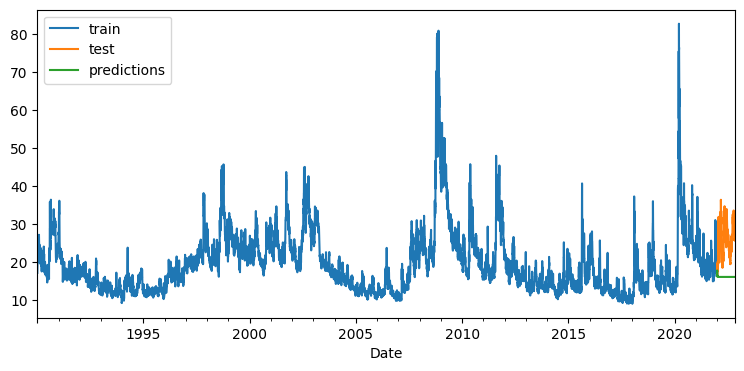

In [193]:
## Plotting Actual Vs Predicted

fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [194]:
## Calculating RMSE for predictions across actual

error_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {error_rmse}")

Test error (rmse): 10.784211497968377


### Univariate Time Series Using SVM

In [195]:
# Create and train forecaster for univariate time series using Random Forest Regressor

forecaster = ForecasterAutoreg(
                regressor = SVR(),
                lags      = 1
             )

forecaster.fit(y=train['VIX_Close'])
forecaster

ForecasterAutoreg 
Regressor: SVR() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1990-01-02 00:00:00'), Timestamp('2021-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
Creation date: 2022-11-29 10:31:02 
Last fit date: 2022-11-29 10:31:07 
Skforecast version: 0.5.1 
Python version: 3.8.10 

In [196]:
## Calculating Predictions
predictions = forecaster.predict(steps=len(test))
predictions.head()

2022-01-01    17.164371
2022-01-02    17.110678
2022-01-03    17.058875
2022-01-04    17.008916
2022-01-05    16.960753
Freq: D, Name: pred, dtype: float64

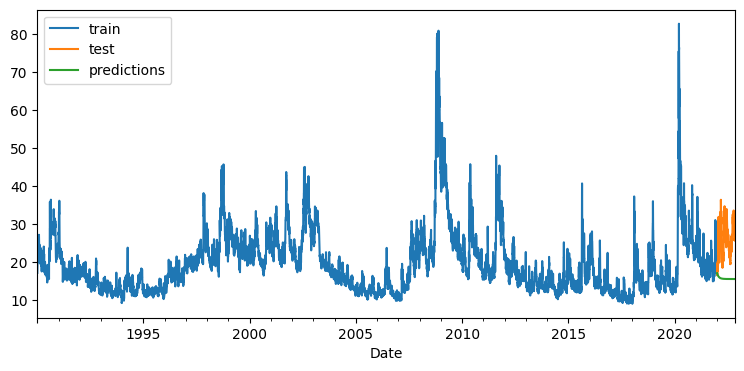

In [197]:
## Plotting Actual Vs Predicted

fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [198]:
## Calculating RMSE for predictions across actual

error_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {error_rmse}")

Test error (rmse): 11.192750343980125


### Multivariate Time Series Using Random Forest

In [199]:
## Create and train forecaster for multivariate time series using Random Forest Regressor
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 1
             )

forecaster.fit(y=train['VIX_Close'], exog=train.drop(columns=['Date','VIX_Close']))
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['TNX_Close', 'Dollar_Close', 'CPI_Close', 'GDP_Close', 'GSCI_Close', 'EPU_Close', 'GSPC_Close', 'VKOSPI_Close', 'HSI_Close', 'year', 'month', 'day', 'dayofweek', 'weekofyear', 'quarter', 'month_start', 'month_end', 'quarter_start', 'quarter_end', 'year_start', 'year_end', 'leap_year', 'lag_1', 'lag_2', 'TNX_Close_prev_week_mean', 'TNX_Close_prev_week_max', 'TNX_Close_prev_week_min', 'TNX_Close_prev_week_std', 'Dollar_Close_prev_week_mean', 'Dollar_Close_prev_week_max', 'Dollar_Close_prev_week_min', 'Dollar_Close_prev_week_std', 'CPI_Close_prev_week_mean', 'CPI_Close_prev_week_max', 'CPI_Close_prev_week_min', 'CPI_Close_prev_week_std', 'GDP_Close_prev_week_mean', 'GDP_Close_prev_week_max', 'GDP_Close_prev_week_min', 'GD

In [200]:
## Calculating Predictions
predictions = forecaster.predict(steps=len(test), exog=test.drop(columns=['Date','VIX_Close']))
predictions.head()

2022-01-01    17.3325
2022-01-02    17.2658
2022-01-03    17.7568
2022-01-04    17.3395
2022-01-05    17.4361
Freq: D, Name: pred, dtype: float64

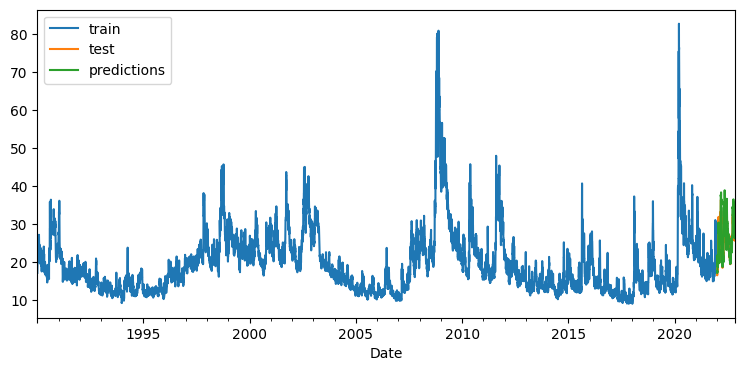

In [201]:
## Plotting Actual Vs Predicted
fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [202]:
## Calculating RMSE for predictions across actual

error_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {error_rmse}")

Test error (rmse): 2.493444034585009


### Multivariate Time Series Using SVM

In [203]:
from sklearn.svm import SVR

## Create and train forecaster for multivariate time series using Support Vector Regressor
forecaster = ForecasterAutoreg(
                regressor = SVR(),
                lags      = 1
             )

forecaster.fit(y=train['VIX_Close'], exog=train.drop(columns=['Date','VIX_Close']))
forecaster

ForecasterAutoreg 
Regressor: SVR() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['TNX_Close', 'Dollar_Close', 'CPI_Close', 'GDP_Close', 'GSCI_Close', 'EPU_Close', 'GSPC_Close', 'VKOSPI_Close', 'HSI_Close', 'year', 'month', 'day', 'dayofweek', 'weekofyear', 'quarter', 'month_start', 'month_end', 'quarter_start', 'quarter_end', 'year_start', 'year_end', 'leap_year', 'lag_1', 'lag_2', 'TNX_Close_prev_week_mean', 'TNX_Close_prev_week_max', 'TNX_Close_prev_week_min', 'TNX_Close_prev_week_std', 'Dollar_Close_prev_week_mean', 'Dollar_Close_prev_week_max', 'Dollar_Close_prev_week_min', 'Dollar_Close_prev_week_std', 'CPI_Close_prev_week_mean', 'CPI_Close_prev_week_max', 'CPI_Close_prev_week_min', 'CPI_Close_prev_week_std', 'GDP_Close_prev_week_mean', 'GDP_Close_prev_week_max', 'GDP_Close_prev_week_min', 'GDP_Close_prev_week_std', 'GSCI_Clos

In [204]:
## Calculating Predictions
predictions = forecaster.predict(steps=len(test), exog=test.drop(columns=['Date','VIX_Close']))
predictions.head()

2022-01-01    19.587825
2022-01-02    19.591965
2022-01-03    19.631531
2022-01-04    19.643552
2022-01-05    19.867846
Freq: D, Name: pred, dtype: float64

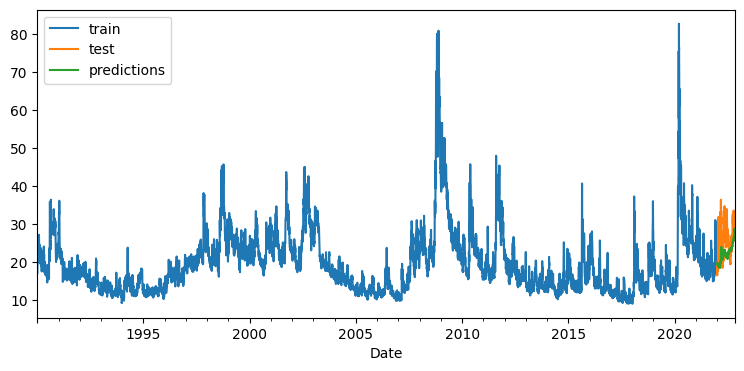

In [205]:
## Plotting Actual Vs Predicted
fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [206]:
## Calculating RMSE for predictions across actual

error_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {error_rmse}")

Test error (rmse): 5.659634064231401


### Feature Importance 
- Top correlated Features

In [143]:
feat_imp = forecaster.get_feature_importance()

feat_imp = feat_imp.sort_values('importance',ascending=False)

In [144]:
feat_imp[:10]

feature  importance
23                       lag_1    0.486012
0                        lag_1    0.482616
24                       lag_2    0.005268
52    GSPC_Close_prev_week_std    0.002211
6                    EPU_Close    0.001327
7                   GSPC_Close    0.001243
56  VKOSPI_Close_prev_week_std    0.001205
32  Dollar_Close_prev_week_std    0.001192
44    GSCI_Close_prev_week_std    0.001125
13                   dayofweek    0.001083

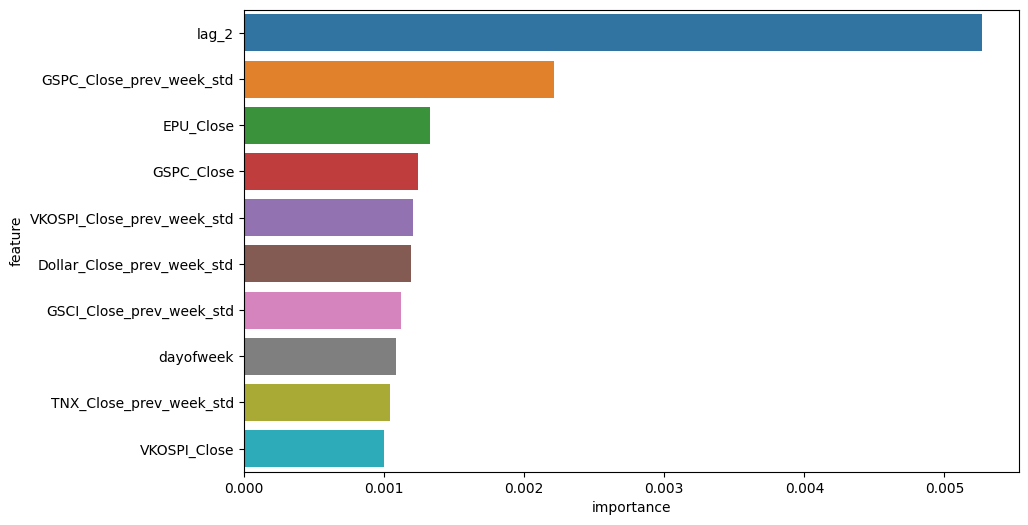

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(y=feat_imp[2:12]['feature'], x=feat_imp[2:12]['importance']);